# Statefarm Sample - redux 1
First, we need to create a validation set so that drivers from train don't appear in valid.

## 1. Create valid set for sample
Let's do this for sample first.

In [1]:
# we'll be doing this in kaggle_data/state-farm-redux
path_to_data = "/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm-redux"
path_to_sample = path_to_data + "/sample"
driver_list = path_to_data + "/driver_imgs_list.csv"

In [2]:
import csv
import glob
import os

In [12]:
# read in all images belonging to one person
columns = ["subject", "classname", "img"]
same_guy_imgs = []

with open (driver_list, "r") as f:
    csv_dict = csv.DictReader(f, fieldnames=columns)
    
    # skip header
    csv_dict.next()
    
    # find the first driver id
    first_data_row = csv_dict.next()
    driver_id = first_data_row["subject"]
    
    # append first row's img to the list
    same_guy_imgs.append(first_data_row["classname"] + "/" + first_data_row["img"])
    
    # append the rest of images for this driver
    for row in csv_dict:
        if row["subject"] == driver_id:
            same_guy_imgs.append(row["classname"] + "/" + row["img"])
    
    print(len(same_guy_imgs))
        

725


In [26]:
# we need to move to our state-farm-redux folder
!pwd
%cd $path_to_data

/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm-redux
/home/ubuntu/courses/deeplearning1/nbs/kaggle_data/state-farm-redux


In [32]:
# ok, 725 images is a bit much for the validation set but all of them do need to be removed from train set
# so move them from train set (after manually creating the c0 - c9 folders via tmux)
for img in same_guy_imgs:
    os.rename(path_to_data + "/train/" + img, path_to_sample + "/valid/" + img)

In [33]:
# I have inadvertantly moved them from my main train set... 
# but that's ok

In [24]:
# now I want to grab say 50 images per category for different people (each of a different person)
# and copy them to my sample/train

columns = ["subject", "classname", "img"]
other_guys_imgs = []

with open (driver_list, "r") as f:
    csv_dict = csv.DictReader(f, fieldnames=columns)
    
    # skip header
    csv_dict.next()
    
    # find the first driver id
    first_data_row = csv_dict.next()
    old_driver_id = first_data_row["subject"]
    old_classname = None
    
    for row in csv_dict:
        new_driver_id = row["subject"]
        new_classname = row["classname"]
        
        # skip until new driver and new class
        if new_driver_id == old_driver_id and new_classname == old_classname:
            continue
        else:
            old_driver_id = new_driver_id
            old_classname = new_classname
            other_guys_imgs.append(row["classname"] + "/" + row["img"])

In [25]:
print(other_guys_imgs)

['c0/img_72999.jpg', 'c1/img_16856.jpg', 'c2/img_42941.jpg', 'c3/img_46464.jpg', 'c4/img_48852.jpg', 'c5/img_78551.jpg', 'c6/img_45361.jpg', 'c7/img_56899.jpg', 'c8/img_99437.jpg', 'c9/img_9877.jpg', 'c0/img_10206.jpg', 'c1/img_45632.jpg', 'c2/img_9873.jpg', 'c3/img_19943.jpg', 'c4/img_92769.jpg', 'c5/img_92514.jpg', 'c6/img_55547.jpg', 'c7/img_100455.jpg', 'c8/img_58933.jpg', 'c9/img_79944.jpg', 'c0/img_72495.jpg', 'c1/img_30433.jpg', 'c2/img_64745.jpg', 'c3/img_98826.jpg', 'c4/img_7875.jpg', 'c5/img_13547.jpg', 'c6/img_94499.jpg', 'c7/img_73378.jpg', 'c8/img_74003.jpg', 'c9/img_58318.jpg', 'c0/img_48693.jpg', 'c1/img_88453.jpg', 'c2/img_6283.jpg', 'c3/img_71831.jpg', 'c4/img_73258.jpg', 'c5/img_16473.jpg', 'c6/img_88240.jpg', 'c7/img_62448.jpg', 'c8/img_67207.jpg', 'c9/img_71334.jpg', 'c0/img_51066.jpg', 'c1/img_22747.jpg', 'c2/img_84591.jpg', 'c3/img_33615.jpg', 'c4/img_18417.jpg', 'c5/img_29372.jpg', 'c6/img_22381.jpg', 'c7/img_10919.jpg', 'c8/img_100735.jpg', 'c9/img_57609.jpg', '

In [26]:
# we have to cut out the first c0-c9, cause that belongs to driver 1
other_guys_imgs = other_guys_imgs[10:]
print(other_guys_imgs)

['c0/img_10206.jpg', 'c1/img_45632.jpg', 'c2/img_9873.jpg', 'c3/img_19943.jpg', 'c4/img_92769.jpg', 'c5/img_92514.jpg', 'c6/img_55547.jpg', 'c7/img_100455.jpg', 'c8/img_58933.jpg', 'c9/img_79944.jpg', 'c0/img_72495.jpg', 'c1/img_30433.jpg', 'c2/img_64745.jpg', 'c3/img_98826.jpg', 'c4/img_7875.jpg', 'c5/img_13547.jpg', 'c6/img_94499.jpg', 'c7/img_73378.jpg', 'c8/img_74003.jpg', 'c9/img_58318.jpg', 'c0/img_48693.jpg', 'c1/img_88453.jpg', 'c2/img_6283.jpg', 'c3/img_71831.jpg', 'c4/img_73258.jpg', 'c5/img_16473.jpg', 'c6/img_88240.jpg', 'c7/img_62448.jpg', 'c8/img_67207.jpg', 'c9/img_71334.jpg', 'c0/img_51066.jpg', 'c1/img_22747.jpg', 'c2/img_84591.jpg', 'c3/img_33615.jpg', 'c4/img_18417.jpg', 'c5/img_29372.jpg', 'c6/img_22381.jpg', 'c7/img_10919.jpg', 'c8/img_100735.jpg', 'c9/img_57609.jpg', 'c0/img_58285.jpg', 'c1/img_42876.jpg', 'c2/img_29485.jpg', 'c3/img_28119.jpg', 'c4/img_82324.jpg', 'c5/img_75836.jpg', 'c6/img_3440.jpg', 'c7/img_49477.jpg', 'c8/img_42490.jpg', 'c9/img_47155.jpg', '

In [27]:
# COPY all to sample/train
from shutil import copyfile
for p in other_guys_imgs:
    copyfile(path_to_data + "/train/" + p, path_to_sample + "/train/" + p)

In [ ]:
# now let's grab images belonging to 6 other people (7 * 750 = 20% of entire set)
# and MOVE them to main valid

In [34]:
(7 * 750./25000.) * 100

21.0

In [44]:
# first grab all subj ids

columns = ["subject", "classname", "img"]
all_ids = []

with open (driver_list, "r") as f:
    csv_dict = csv.DictReader(f, fieldnames=columns)
    
    # skip header
    csv_dict.next()
    old_driver_id = csv_dict.next()["subject"]
    
    for row in csv_dict:
        new_driver_id = row["subject"]
        
        # skip until new driver 
        if new_driver_id == old_driver_id:
            continue
        else:
            old_driver_id = new_driver_id
            all_ids.append(row["subject"])

In [46]:
print(all_ids)
print(len(all_ids))

['p012', 'p014', 'p015', 'p016', 'p021', 'p022', 'p024', 'p026', 'p035', 'p039', 'p041', 'p042', 'p045', 'p047', 'p049', 'p050', 'p051', 'p052', 'p056', 'p061', 'p064', 'p066', 'p072', 'p075', 'p081']
25


In [48]:
import numpy as np
valid_ids = list(np.random.permutation(all_ids))[:6]
print(valid_ids)
# ['p056', 'p026', 'p039', 'p081', 'p012', 'p035']

['p056', 'p026', 'p039', 'p081', 'p012', 'p035']


In [49]:
# now MOVE all imgs for these 6 people to data/valid
print(valid_ids)

['p056', 'p026', 'p039', 'p081', 'p012', 'p035']


In [52]:
columns = ["subject", "classname", "img"]
same_guys_valid_imgs = []

with open (driver_list, "r") as f:
    csv_dict = csv.DictReader(f, fieldnames=columns)
    
    # skip header
    csv_dict.next()
    
    # if id matches, add the img
    for row in csv_dict:
        new_driver_id = row["subject"]
        
        if new_driver_id in valid_ids:
            same_guys_valid_imgs.append(row["classname"] + "/" + row["img"])

print(len(same_guys_valid_imgs))
print(same_guys_valid_imgs)

5135
['c0/img_10206.jpg', 'c0/img_27079.jpg', 'c0/img_50749.jpg', 'c0/img_97089.jpg', 'c0/img_37741.jpg', 'c0/img_65697.jpg', 'c0/img_3866.jpg', 'c0/img_19098.jpg', 'c0/img_31885.jpg', 'c0/img_41423.jpg', 'c0/img_26907.jpg', 'c0/img_71304.jpg', 'c0/img_17470.jpg', 'c0/img_88793.jpg', 'c0/img_1367.jpg', 'c0/img_29348.jpg', 'c0/img_20878.jpg', 'c0/img_6461.jpg', 'c0/img_87811.jpg', 'c0/img_47410.jpg', 'c0/img_98046.jpg', 'c0/img_57583.jpg', 'c0/img_27214.jpg', 'c0/img_973.jpg', 'c0/img_9006.jpg', 'c0/img_28357.jpg', 'c0/img_56851.jpg', 'c0/img_62066.jpg', 'c0/img_40209.jpg', 'c0/img_49423.jpg', 'c0/img_71160.jpg', 'c0/img_54924.jpg', 'c0/img_1267.jpg', 'c0/img_17723.jpg', 'c0/img_88538.jpg', 'c0/img_96522.jpg', 'c0/img_31289.jpg', 'c0/img_37288.jpg', 'c0/img_67875.jpg', 'c0/img_2813.jpg', 'c0/img_59570.jpg', 'c0/img_70406.jpg', 'c0/img_20588.jpg', 'c0/img_60168.jpg', 'c0/img_50246.jpg', 'c0/img_65097.jpg', 'c0/img_24419.jpg', 'c0/img_47332.jpg', 'c0/img_89135.jpg', 'c0/img_93208.jpg', 'c

In [53]:
# actually MOVE the imgs
for img in same_guys_valid_imgs:
    os.rename(path_to_data + "/train/" + img, path_to_data + "/valid/" + img)

## Now actual machine learning :)

In [3]:
from theano.sandbox import cuda
cuda.use('gpu1')

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
WARNING (theano.sandbox.cuda): Ignoring call to use(1), GPU number 0 is already in use.


In [4]:
%matplotlib inline
from __future__ import print_function, division
#path = "data/state/"
path = "data/state/sample/"
import utils; reload(utils)
from utils import *
from IPython.display import FileLink

Using Theano backend.


In [5]:
s_batch_size = 64

In [6]:
s_t_batches = get_batches(path_to_sample + "/train/", batch_size=s_batch_size)
s_v_batches = get_batches(path_to_sample + "/valid/", batch_size=s_batch_size)

Found 250 images belonging to 10 classes.
Found 725 images belonging to 10 classes.


In [7]:
(s_v_classes, s_t_classes, s_v_labels, s_t_labels, s_v_filenames, s_t_filenames,
    s_test_filename) = get_classes(path_to_sample + "/")

Found 250 images belonging to 10 classes.
Found 725 images belonging to 10 classes.
Found 0 images belonging to 1 classes.


In [68]:
print(s_test_filename)
print(len(s_test_filename))

[]
0


## Basic models
Let's try the linear model first, to obtain a benchmark.

### Linear model
We create a single dense (fully connected) layer and add batchnorm to it, so that we don't have to worry about normalizing the input

In [69]:
lm = Sequential([
        BatchNormalization(axis=1, input_shape=(3, 224, 224)),
        Flatten(),
        Dense(10, activation="softmax")
    ])

In [70]:
lm.compile(Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

In [71]:
s_t_batches.nb_sample

250

In [73]:
lm.fit_generator(s_t_batches, s_t_batches.nb_sample, nb_epoch=2, validation_data=s_v_batches, nb_val_samples=s_v_batches.nb_sample)

Epoch 1/2
250/250 [==============================] - 13s - loss: 11.1370 - acc: 0.0920 - val_loss: 14.1618 - val_acc: 0.1214
Epoch 2/2
250/250 [==============================] - 10s - loss: 13.8603 - acc: 0.1320 - val_loss: 14.1879 - val_acc: 0.1186


In [74]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_1 (BatchNormal(None, 3, 224, 224)   6           batchnormalization_input_1[0][0] 
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 150528)        0           batchnormalization_1[0][0]       
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 10)            1505290     flatten_1[0][0]                  
Total params: 1505296
____________________________________________________________________________________________________


In [78]:
# we have a lot of parameters (>150K) so we should have enough to get overfitting (since we have 0 regularization).
# this could mean that our learning rate is too high and we've fallen to a solution that predicts just a couple categories well.

# as a side note, both batches.nb_sample and batches.N seem to return the number of images in that batch
print(s_v_batches.nb_sample)
s_v_batches.N

725


725

In [83]:
np.round(lm.predict_generator(s_t_batches, s_t_batches.N)[:20], 2)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.

In [82]:
# yep, it's only predicting classes c2 and c7.

In [89]:
# let's try the same model but with a lower learning rate
lm2 = Sequential([
        BatchNormalization(axis=1, input_shape=(3,224,224)),
        Flatten(),
        Dense(10, activation="softmax")
    ])
lm2.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
lm2.fit_generator(s_t_batches, s_t_batches.nb_sample, nb_epoch=5, validation_data=s_v_batches, nb_val_samples=s_v_batches.nb_sample)

Epoch 1/5
250/250 [==============================] - 12s - loss: 10.4297 - acc: 0.1360 - val_loss: 13.6325 - val_acc: 0.1517
Epoch 2/5
250/250 [==============================] - 9s - loss: 13.2149 - acc: 0.1480 - val_loss: 13.2861 - val_acc: 0.1710
Epoch 3/5
250/250 [==============================] - 9s - loss: 13.4158 - acc: 0.1360 - val_loss: 13.6244 - val_acc: 0.1490
Epoch 4/5
250/250 [==============================] - 10s - loss: 13.6101 - acc: 0.1480 - val_loss: 13.7627 - val_acc: 0.1131
Epoch 5/5
250/250 [==============================] - 9s - loss: 13.6558 - acc: 0.1440 - val_loss: 13.9604 - val_acc: 0.1297


In [86]:
np.round(lm2.predict_generator(s_t_batches, s_t_batches.N)[:20], 2)

array([[ 0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.  ,  0.99],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.91,  0.  ,  0.08],
       [ 0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.77,  0.  ,  0.22],
       [ 0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.5 ,  0.  ,  0.49],
       [ 0.06,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.  ,  0.92],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.23,  0.  ,  0.77],
       [ 0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.82,  0.  ,  0.16],
       [ 0.02,  0.01,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.94],
       [ 0.06,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.29,  0.  ,  0.65],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.02,  0.  ,  0.98],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.99],
       [ 0.05,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.52,  0.  ,  0.43],
       [ 0.12,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0

In [88]:
# well, me seem to be predicting other classes too now, so at least that's a bit better.
# let's try a smaller learning rate.
lm2.optimizer.lr = 0.001
lm2.fit_generator(s_t_batches, s_t_batches.nb_sample, nb_epoch=5, validation_data=s_v_batches, nb_val_samples=s_v_batches.nb_sample)

Epoch 1/5
250/250 [==============================] - 12s - loss: 1.7775 - acc: 0.4120 - val_loss: 7.1809 - val_acc: 0.0607
Epoch 2/5
250/250 [==============================] - 9s - loss: 1.7996 - acc: 0.4400 - val_loss: 6.6620 - val_acc: 0.0897
Epoch 3/5
250/250 [==============================] - 9s - loss: 1.5857 - acc: 0.5120 - val_loss: 6.3385 - val_acc: 0.0676
Epoch 4/5
250/250 [==============================] - 10s - loss: 1.5011 - acc: 0.5880 - val_loss: 5.5617 - val_acc: 0.0690
Epoch 5/5
250/250 [==============================] - 9s - loss: 1.3736 - acc: 0.6320 - val_loss: 5.2116 - val_acc: 0.0800


In [90]:
# well, in Jeremy's case the accuracy on validation did get better, but not so much on mine.

In [96]:
# he has another method:
rnd_batches = get_batches(path_to_sample +'/valid', batch_size=s_batch_size, shuffle=True)
s_val_results = [lm2.evaluate_generator(rnd_batches, rnd_batches.nb_sample) for i in range(3)]
np.round(s_val_results, 2)

Found 725 images belonging to 10 classes.


array([[ 14.01,   0.13],
       [ 14.05,   0.12],
       [ 14.12,   0.12]])

In [ ]:
# the above returns loss and accuracy (because we specified that as metric for the model lm2 in compile(metrics=["accuracy"]))

### Regularized lm
We cannot use dropout in a model with just one layer really. We'd be losing our parameters.
But we can use sth called l2 regularization (which will add the sum of squares of the weights to our loss function).

In [97]:
lm2_regularized = Sequential([
        BatchNormalization(axis=1, input_shape=(3, 224, 224)),
        Flatten(),
        Dense(10, activation="softmax", W_regularizer=l2(0.01))
    ])

lm2_regularized.compile(Adam(lr=10e-5), loss="categorical_crossentropy", metrics=["accuracy"])
lm2_regularized.fit_generator(s_t_batches, s_t_batches.nb_sample, nb_epoch=2, validation_data=s_v_batches, nb_val_samples=s_v_batches.nb_sample)

INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.12-64/lock_dir/lock


Epoch 1/2
250/250 [==============================] - 12s - loss: 7.8151 - acc: 0.0880 - val_loss: 14.1839 - val_acc: 0.1200
Epoch 2/2
250/250 [==============================] - 10s - loss: 7.1718 - acc: 0.2160 - val_loss: 14.5174 - val_acc: 0.0993


In [98]:
# let's try to decrease the learning rate
lm2_regularized.optimizer.lr=0.001

In [100]:
lm2_regularized.fit_generator(s_t_batches, s_t_batches.nb_sample, nb_epoch=5, validation_data=s_v_batches, nb_val_samples=s_v_batches.nb_sample)

Epoch 1/5
250/250 [==============================] - 12s - loss: 2.2828 - acc: 0.7280 - val_loss: 12.5882 - val_acc: 0.1186
Epoch 2/5
250/250 [==============================] - 9s - loss: 1.6228 - acc: 0.8000 - val_loss: 9.4586 - val_acc: 0.1145
Epoch 3/5
250/250 [==============================] - 9s - loss: 1.6613 - acc: 0.8320 - val_loss: 8.3525 - val_acc: 0.1807
Epoch 4/5
250/250 [==============================] - 9s - loss: 1.7613 - acc: 0.8280 - val_loss: 9.5670 - val_acc: 0.1269
Epoch 5/5
250/250 [==============================] - 9s - loss: 1.3652 - acc: 0.9040 - val_loss: 7.2485 - val_acc: 0.1807


## Single Hidden Layer Model
Next up we can try a model with a single hidden layer. We'll start with a small hidden layer for a couple of epochs and then increase it.

In [102]:
shl_model = Sequential([
        BatchNormalization(axis=1, input_shape=(3, 224, 224)),
        Flatten(),
        Dense(100, activation="relu"),
        BatchNormalization(),
        Dense(10, activation="softmax")
    ])

shl_model.compile(Adam(lr=1e5), loss="categorical_crossentropy", metrics=["accuracy"])
shl_model.fit_generator(s_t_batches, s_t_batches.nb_sample, nb_epoch=5, validation_data=s_v_batches, nb_val_samples=s_v_batches.nb_sample)

shl_model.optimizer.lr = 0.001
shl_model.fit_generator(s_t_batches, s_t_batches.nb_sample, nb_epoch=5, validation_data=s_v_batches, nb_val_samples=s_v_batches.nb_sample)

INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.12-64/lock_dir/lock


Epoch 1/5
250/250 [==============================] - 12s - loss: 2.5674 - acc: 0.2360 - val_loss: 11.9416 - val_acc: 0.0800
Epoch 2/5
250/250 [==============================] - 9s - loss: 1.9673 - acc: 0.3520 - val_loss: 10.1469 - val_acc: 0.1172
Epoch 3/5
250/250 [==============================] - 9s - loss: 1.4647 - acc: 0.5800 - val_loss: 8.0268 - val_acc: 0.1531
Epoch 4/5
250/250 [==============================] - 9s - loss: 1.1470 - acc: 0.7520 - val_loss: 7.6219 - val_acc: 0.1200
Epoch 5/5
250/250 [==============================] - 10s - loss: 0.9722 - acc: 0.7560 - val_loss: 8.0459 - val_acc: 0.1186
Epoch 1/5
250/250 [==============================] - 13s - loss: 0.7477 - acc: 0.8760 - val_loss: 7.2552 - val_acc: 0.1145
Epoch 2/5
250/250 [==============================] - 10s - loss: 0.6017 - acc: 0.9080 - val_loss: 6.3376 - val_acc: 0.1517
Epoch 3/5
250/250 [==============================] - 12s - loss: 0.4847 - acc: 0.9680 - val_loss: 5.8508 - val_acc: 0.1655
Epoch 4/5
250/250

In [103]:
# we know that this is a cv (computer vision) problem, where convolution layers are useful, so that's what we'll try next.

### Single Hidden Convolutional Layer
Like I said. Although Jeremy is using two from the start, despite title.
Note that we start with Convolutions towards 32 3x3 filters (using relu) and follow each convo by batchnorm, where we have to specify the axis! And also maxpooling.

So it's convo + batchnorm with axis + maxpool.

In [107]:
shc_model = Sequential([
        BatchNormalization(axis=1, input_shape=(3, 224, 224)),
        Convolution2D(32, 3, 3, activation="relu"),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Convolution2D(64, 3, 3, activation="relu"),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(200, activation="relu"),
        BatchNormalization(),
        Dense(10, activation="softmax")
    ])
shc_model.compile(Adam(lr=1e-4), loss="categorical_crossentropy", metrics=["accuracy"])
shc_model.fit_generator(s_t_batches, s_t_batches.nb_sample, nb_epoch=2, validation_data=s_v_batches, nb_val_samples=s_v_batches.nb_sample)

shc_model.optimizer.lr = 0.001
shc_model.fit_generator(s_t_batches, s_t_batches.nb_sample, nb_epoch=4, validation_data=s_v_batches, nb_val_samples=s_v_batches.nb_sample)

Epoch 1/2
250/250 [==============================] - 19s - loss: 2.7812 - acc: 0.1880 - val_loss: 3.5109 - val_acc: 0.1586
Epoch 2/2
250/250 [==============================] - 14s - loss: 1.3454 - acc: 0.6120 - val_loss: 2.9665 - val_acc: 0.1600
Epoch 1/4
250/250 [==============================] - 20s - loss: 0.5587 - acc: 0.8800 - val_loss: 2.8243 - val_acc: 0.0883
Epoch 2/4
250/250 [==============================] - 14s - loss: 0.2791 - acc: 0.9640 - val_loss: 2.6975 - val_acc: 0.0828
Epoch 3/4
250/250 [==============================] - 14s - loss: 0.1560 - acc: 1.0000 - val_loss: 2.6151 - val_acc: 0.0676
Epoch 4/4
250/250 [==============================] - 14s - loss: 0.0879 - acc: 1.0000 - val_loss: 2.4902 - val_acc: 0.0869


In [108]:
# we can see that the accuracy on train set is rapdily increasing so regularization seems like a natural next step.

In [ ]:
# let's define this as a function

In [ ]:
def conv2(passed_batches):
    model = Sequential([
        BatchNormalization(axis=1, input_shape=(3, 224, 224)),
        Convolution2D(32, 3, 3, activation="relu"),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Convolution2D(64, 3, 3, activation="relu"),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(200, activation="relu"),
        BatchNormalization(),
        Dense(10, activation="softmax")
    ])
    model.compile(Adam(lr=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit_generator(passed_batches, passed_batches.nb_sample, nb_epoch=2, validation_data=s_v_batches, nb_val_samples=s_v_batches.nb_sample)

    model.optimizer.lr = 0.000001
    model.fit_generator(passed_batches, passed_batches.nb_sample, nb_epoch=4, validation_data=s_v_batches, nb_val_samples=s_v_batches.nb_sample)
    
    return model

In [13]:
conv2(s_t_batches)

Epoch 1/2
250/250 [==============================] - 16s - loss: 3.1304 - acc: 0.0920 - val_loss: 3.2710 - val_acc: 0.0124
Epoch 2/2
250/250 [==============================] - 14s - loss: 2.3842 - acc: 0.2160 - val_loss: 2.7392 - val_acc: 0.0359
Epoch 1/4
250/250 [==============================] - 17s - loss: 1.8909 - acc: 0.3360 - val_loss: 2.5692 - val_acc: 0.0593
Epoch 2/4
250/250 [==============================] - 14s - loss: 1.5782 - acc: 0.4880 - val_loss: 2.4672 - val_acc: 0.0855
Epoch 3/4
250/250 [==============================] - 14s - loss: 1.2757 - acc: 0.6920 - val_loss: 2.4474 - val_acc: 0.0759
Epoch 4/4
250/250 [==============================] - 14s - loss: 1.0766 - acc: 0.7720 - val_loss: 2.3994 - val_acc: 0.0634


## Regularization 1 - Data Augmentation
We seem to be overfitting, so let's see what we can do (we're essentially getting more data with data augmentation).

1. Width shift - move the image left and right

In [21]:
from keras.preprocessing import image
gen_t = image.ImageDataGenerator(width_shift_range=0.01)
batches = get_batches(path_to_sample + "/train/", gen_t, batch_size=32)

Found 250 images belonging to 10 classes.


In [24]:
conv2(batches)

Epoch 1/2
250/250 [==============================] - 15s - loss: 3.0576 - acc: 0.1000 - val_loss: 2.4552 - val_acc: 0.0662
Epoch 2/2
250/250 [==============================] - 14s - loss: 2.3556 - acc: 0.1840 - val_loss: 2.3393 - val_acc: 0.1172
Epoch 1/4
250/250 [==============================] - 16s - loss: 1.9377 - acc: 0.3440 - val_loss: 2.3311 - val_acc: 0.0966
Epoch 2/4
250/250 [==============================] - 14s - loss: 1.6763 - acc: 0.4360 - val_loss: 2.3158 - val_acc: 0.1076
Epoch 3/4
250/250 [==============================] - 14s - loss: 1.3889 - acc: 0.5880 - val_loss: 2.3295 - val_acc: 0.1186
Epoch 4/4
250/250 [==============================] - 14s - loss: 1.2027 - acc: 0.6680 - val_loss: 2.3418 - val_acc: 0.1200


2. Height shift - move it a bit up and down

In [27]:
gen_t = image.ImageDataGenerator(height_shift_range=0.05)
batches = get_batches(path_to_sample + "/train/", gen_t, batch_size=32)
model = conv2(batches)

Found 250 images belonging to 10 classes.
Epoch 1/2
250/250 [==============================] - 15s - loss: 3.0881 - acc: 0.1160 - val_loss: 7.4642 - val_acc: 0.0703
Epoch 2/2
250/250 [==============================] - 15s - loss: 1.7044 - acc: 0.4280 - val_loss: 4.9200 - val_acc: 0.0676
Epoch 1/4
250/250 [==============================] - 16s - loss: 1.2255 - acc: 0.6080 - val_loss: 3.6304 - val_acc: 0.0786
Epoch 2/4
250/250 [==============================] - 14s - loss: 0.9719 - acc: 0.7360 - val_loss: 3.0129 - val_acc: 0.0690
Epoch 3/4
250/250 [==============================] - 14s - loss: 0.7033 - acc: 0.8280 - val_loss: 2.9113 - val_acc: 0.0745
Epoch 4/4
250/250 [==============================] - 14s - loss: 0.6371 - acc: 0.8360 - val_loss: 2.7653 - val_acc: 0.0745


3. random sheer (sharp) angles

In [29]:
gen_t = image.ImageDataGenerator(shear_range=0.1)
batches = get_batches(path_to_sample + "/train/", gen_t, batch_size=32)
model = conv2(batches)

Found 250 images belonging to 10 classes.
Epoch 1/2
250/250 [==============================] - 16s - loss: 3.2528 - acc: 0.0840 - val_loss: 5.5879 - val_acc: 0.1172
Epoch 2/2
250/250 [==============================] - 14s - loss: 1.4095 - acc: 0.5440 - val_loss: 3.8847 - val_acc: 0.1476
Epoch 1/4
250/250 [==============================] - 16s - loss: 0.7440 - acc: 0.8360 - val_loss: 3.2791 - val_acc: 0.2303
Epoch 2/4
250/250 [==============================] - 14s - loss: 0.5123 - acc: 0.9120 - val_loss: 2.7758 - val_acc: 0.1117
Epoch 3/4
250/250 [==============================] - 14s - loss: 0.3417 - acc: 0.9720 - val_loss: 2.5400 - val_acc: 0.1062
Epoch 4/4
250/250 [==============================] - 14s - loss: 0.2185 - acc: 0.9880 - val_loss: 2.5333 - val_acc: 0.1007


X. Rotation

In [31]:
gen_t = image.ImageDataGenerator(rotation_range=15)
batches = get_batches(path_to_sample + "/train/", gen_t, batch_size=32)
model = conv2(batches)

Found 250 images belonging to 10 classes.
Epoch 1/2
250/250 [==============================] - 15s - loss: 3.2503 - acc: 0.1160 - val_loss: 6.0140 - val_acc: 0.0703
Epoch 2/2
250/250 [==============================] - 14s - loss: 1.9994 - acc: 0.3800 - val_loss: 5.9959 - val_acc: 0.0731
Epoch 1/4
250/250 [==============================] - 18s - loss: 1.3176 - acc: 0.5520 - val_loss: 4.0547 - val_acc: 0.0634
Epoch 2/4
250/250 [==============================] - 15s - loss: 1.2255 - acc: 0.6160 - val_loss: 3.6461 - val_acc: 0.0786
Epoch 3/4
250/250 [==============================] - 14s - loss: 0.9726 - acc: 0.7160 - val_loss: 3.1261 - val_acc: 0.0952
Epoch 4/4
250/250 [==============================] - 15s - loss: 0.9076 - acc: 0.7600 - val_loss: 2.7249 - val_acc: 0.1172


X. Channel shift - randomly changing the RGB colors

In [33]:
gen_t = image.ImageDataGenerator(channel_shift_range=20)
batches = get_batches(path_to_sample + "/train/", gen_t, batch_size=32)
model = conv2(batches)

Found 250 images belonging to 10 classes.
Epoch 1/2
250/250 [==============================] - 16s - loss: 3.9169 - acc: 0.0720 - val_loss: 10.0542 - val_acc: 0.1048
Epoch 2/2
250/250 [==============================] - 14s - loss: 1.5967 - acc: 0.5320 - val_loss: 6.5283 - val_acc: 0.1090
Epoch 1/4
250/250 [==============================] - 17s - loss: 1.0342 - acc: 0.7480 - val_loss: 3.9331 - val_acc: 0.0938
Epoch 2/4
250/250 [==============================] - 14s - loss: 0.7304 - acc: 0.8840 - val_loss: 3.0507 - val_acc: 0.0786
Epoch 3/4
250/250 [==============================] - 14s - loss: 0.4039 - acc: 0.9600 - val_loss: 2.7657 - val_acc: 0.0717
Epoch 4/4
250/250 [==============================] - 14s - loss: 0.1886 - acc: 0.9880 - val_loss: 2.7100 - val_acc: 0.0690


### All data aug together

In [ ]:
gen_t = image.ImageDataGenerator(width_shift_range=0.01, height_shift_range=0.05, shear_range=0.1, 
                                 rotation_range=15, channel_shift_range=20)
batches = get_batches(path_to_sample + "/train/", gen_t, batch_size=32)
final_sample_model = conv2(batches)

Found 250 images belonging to 10 classes.
Epoch 1/2
250/250 [==============================] - 15s - loss: 3.1060 - acc: 0.1000 - val_loss: 2.8789 - val_acc: 0.1697
Epoch 2/2
250/250 [==============================] - 15s - loss: 2.8340 - acc: 0.1640 - val_loss: 2.4901 - val_acc: 0.1255
Epoch 1/4
250/250 [==============================] - 16s - loss: 2.7233 - acc: 0.1480 - val_loss: 2.4195 - val_acc: 0.1269
Epoch 2/4
218/250 [=========================>....] - ETA: 0s - loss: 2.5660 - acc: 0.1789

In [ ]:
final_sample_model.optimizer.lr = 0.000001
final_sample_model.fit_generator(batches, batches.nb_sample, nb_epoch=25, validation_data=s_v_batches, 
                 nb_val_samples=s_v_batches.nb_sample)

In [57]:
#Plots is a helper function in utils.py
def plots_idx(indices, titles=None):
    utils.plots([image.load_img(path_to_valid + filenames[i]) for i in indices], titles=titles)

In [58]:
final_sample_model.optimizer.lr = 0.00001
final_sample_model.fit_generator(batches, batches.nb_sample, nb_epoch=25, validation_data=s_v_batches, 
                 nb_val_samples=s_v_batches.nb_sample)

Epoch 1/25
250/250 [==============================] - 18s - loss: 1.9581 - acc: 0.3400 - val_loss: 2.3959 - val_acc: 0.0910
Epoch 2/25
250/250 [==============================] - 14s - loss: 1.9518 - acc: 0.3280 - val_loss: 2.4128 - val_acc: 0.0883
Epoch 3/25
250/250 [==============================] - 15s - loss: 1.8906 - acc: 0.3400 - val_loss: 2.3984 - val_acc: 0.0897
Epoch 4/25
218/250 [=========================>....] - ETA: 0s - loss: 1.7928 - acc: 0.3761

KeyboardInterrupt: 

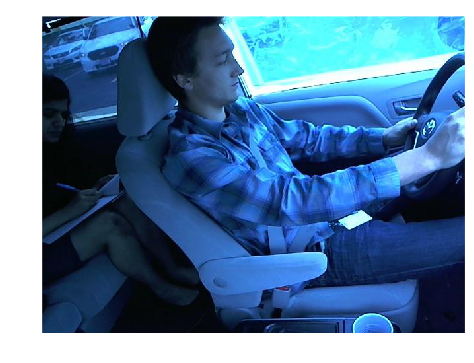

In [52]:
utils.plots([image.load_img(path_to_sample + "/train/" + "c0/" + "img_51066.jpg")], titles=None)